In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#salvando o caminho do arquivo em file_path
file_path = Path(
    '../../Dados/Dados-Metereologicos/Diarios/' +\
     'dados_82798_D_C_2008-01-01_2013-12-31.csv'
     ) 

#importando dataframe
df_diario = pd.read_csv(file_path, header=9, sep=';')

#excluindo a coluna a mais
df_diario.drop('Unnamed: 7', axis=1, inplace=True)

#tornando a data o índice dataframe
df_diario['Data Medicao'] = pd.to_datetime(df_diario['Data Medicao'])
df_diario.set_index('Data Medicao', inplace=True)

#transformando o tipo dos dados para float
for coluna in df_diario.columns: 
    df_diario[coluna] = df_diario[coluna].str.replace(',','.').astype(float) 

df_diario.head()

,"INSOLACAO TOTAL, DIARIO(h)","PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)","VENTO, VELOCIDADE MEDIA DIARIA(m/s)"
Data Medicao,,,,,,
2008-01-01,10.4,0.0,31.0,27.82,25.5,3.133333
2008-01-02,10.2,0.0,30.8,27.94,25.1,3.733333
2008-01-03,9.8,0.0,31.6,28.26,24.7,5.200000
2008-01-04,9.2,0.0,31.2,28.18,26.1,4.066667
2008-01-05,10.2,0.0,31.0,28.18,25.5,3.833333


In [3]:
#criando o dataframe semanal
df_semanal = pd.DataFrame(columns = ['INSOLAÇÃO MÁXIMA(h)','PRECIPITAÇÃO MÁXIMA(mm)',
                                     'TEMPERATURA MÁXIMA(°C)', 'VELOCIDADE DO VENTO MÁXIMA (m/s)'])

#a insolação máxima
df_semanal['INSOLAÇÃO MÁXIMA(h)'] = df_diario['INSOLACAO TOTAL, DIARIO(h)'].resample('W-SUN').max() 

#a precipitação total máxima
df_semanal['PRECIPITAÇÃO MÁXIMA(mm)'] = df_diario['PRECIPITACAO TOTAL, DIARIO(mm)'].resample('W-SUN').max()

#a temperatura máxima
df_semanal['TEMPERATURA MÁXIMA(°C)'] = df_diario['TEMPERATURA MAXIMA, DIARIA(°C)'].resample('W-SUN').max()

#velocidade do vento média máxima
df_semanal['VELOCIDADE DO VENTO MÁXIMA (m/s)'] = df_diario['VENTO, VELOCIDADE MEDIA DIARIA(m/s)'].resample('W-SUN').max()


df_semanal.head()

,INSOLAÇÃO MÁXIMA(h),PRECIPITAÇÃO MÁXIMA(mm),TEMPERATURA MÁXIMA(°C),VELOCIDADE DO VENTO MÁXIMA (m/s)
Data Medicao,,,,
2008-01-06,10.4,0.0,31.6,5.200000
2008-01-13,10.1,1.8,31.4,3.900000
2008-01-20,9.6,18.8,30.6,3.966667
2008-01-27,10.9,3.6,31.8,3.700000
2008-02-03,10.1,45.2,31.8,3.566667


## Gráficos

In [4]:
#Propriedade dos Gráficos

#selecionando a aparência do gráfico
plt.style.use('seaborn-dark-palette')

#função que cria os subplots [3x2]
def met_subplots(fig_axes, coluna, label_y, legenda):
    label_x = 'Semana'
    ano = 2008
    #laço que percorre cada subplot, sendo i a linha e j a coluna desse.
    for i in range(3):
        for j in range(2):
            
            #selecionando o dado que vai ser plotado (divididos por anos) 
            df = df_semanal.loc[df_semanal.index.year == ano][coluna]
            
            #criando uma lista para enumerar a semana de acordo com o ano
            semana = [num_da_semana+1 for num_da_semana in range(df.count())]
            
            #realizando o plot numero_da_semana x variável 
            fig_axes[i,j].plot(semana, df, label=legenda)

            #definindo o título do subplot
            fig_axes[i,j].set_title(f'Ano de {ano}', size=25)
            ano = ano + 1

            #definindo labels
            fig_axes[i,j].set_xlabel(label_x, size=20)
            fig_axes[i,j].set_ylabel(label_y, size=20)

            #ajustando os ticks
            fig_axes[i,j].tick_params(axis='x', labelsize=16, rotation=40)
            fig_axes[i,j].tick_params(axis='y', labelsize=16)

            #f1_axes[i,j].xaxis.set_major_locator(ticker.LinearLocator(52))
            #f1_axes[i,j].xaxis.set_major_formatter(fmt)
            #f1_axes[i,j].xaxis.set_minor_locator(days)

            #adicionando a grade e a legenda ao subplot
            fig_axes[i,j].grid(True)
            if legenda != '':
                fig_axes[i,j].legend()

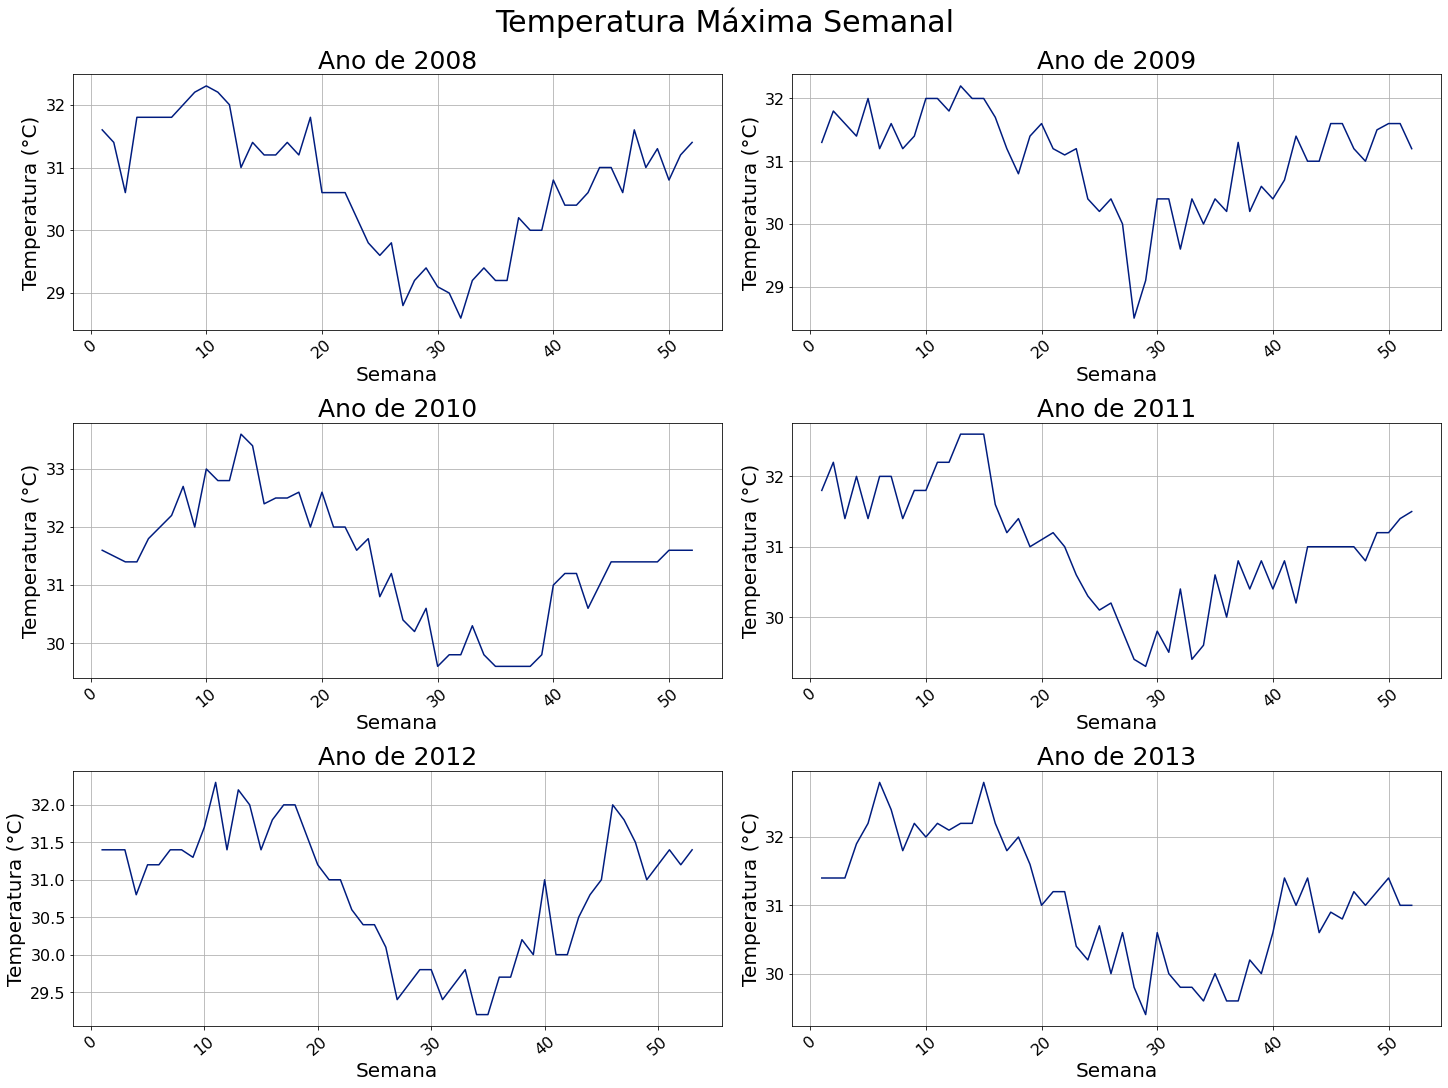

In [5]:
#Temperatura

#criando os objetos para realizar o subplot
fig1, f1_axes  = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(20,15))

#Definindo o título superior
fig1.suptitle('Temperatura Máxima Semanal', size=30)

#Definindo os labels x e y
label_y_T = 'Temperatura (°C)'

coluna_temp_max = 'TEMPERATURA MÁXIMA(°C)'


#usando a função para realizar o gráfico
met_subplots(fig_axes = f1_axes, coluna = coluna_temp_max, label_y = label_y_T, legenda = '')


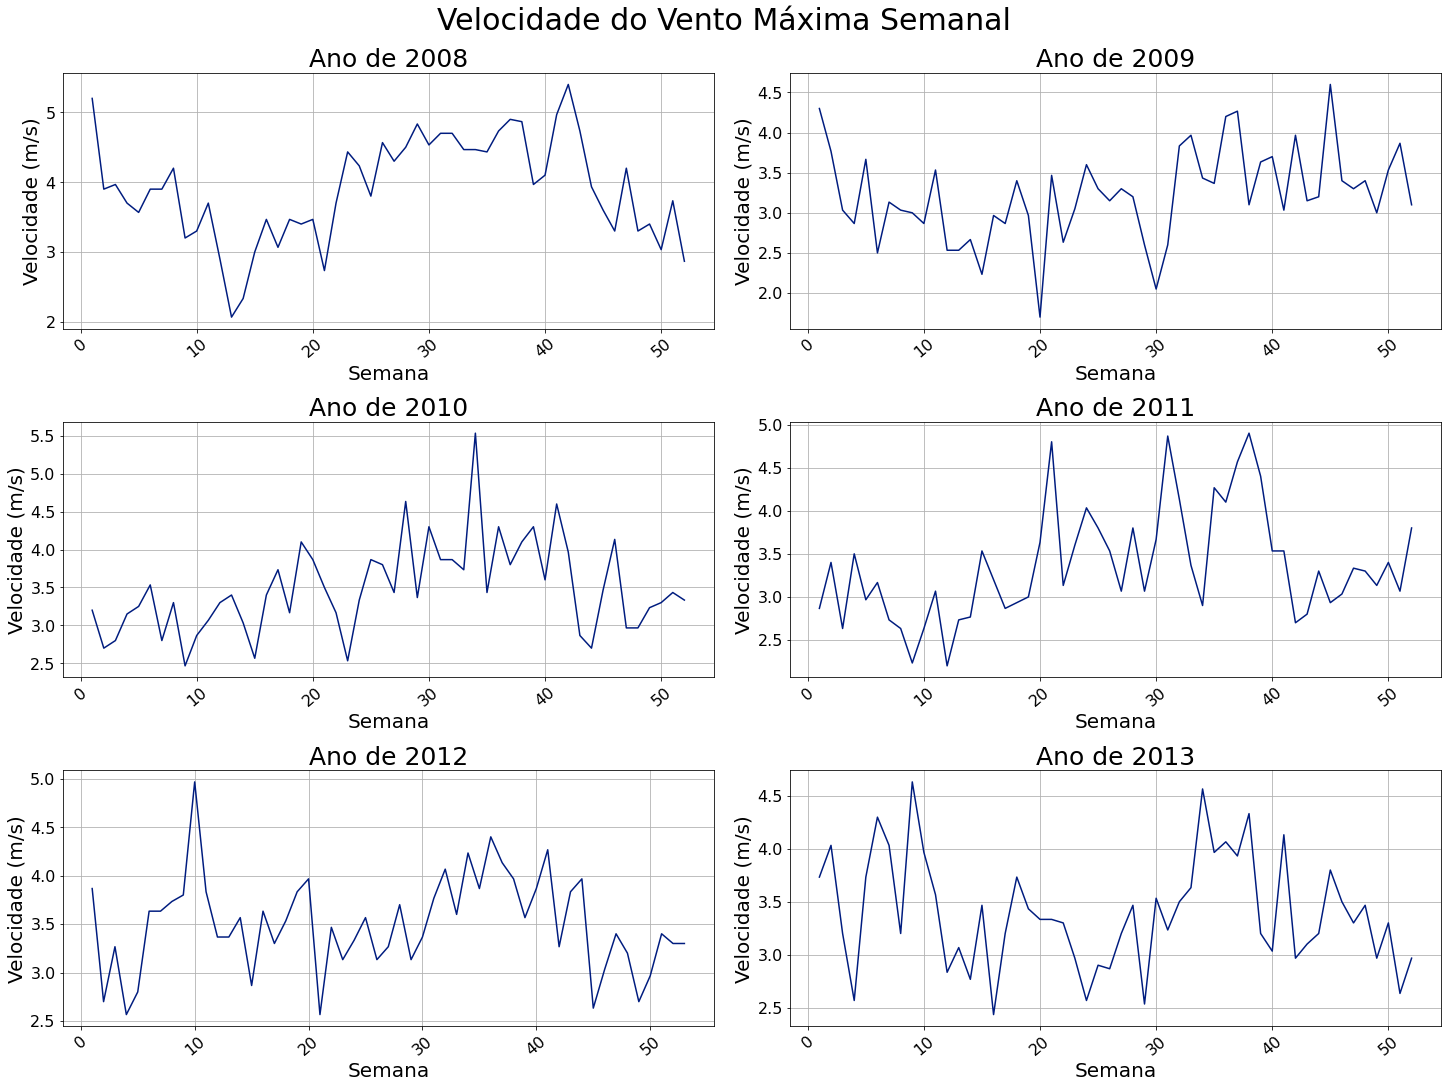

In [6]:
#Vento

#criando os objetos para realizar o subplot
fig2, f2_axes  = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(20,15))

#Definindo o título superior
fig2.suptitle('Velocidade do Vento Máxima Semanal', size=30)

#Definindo os labels x e y
label_y_V = 'Velocidade (m/s)'
coluna_vento_max = 'VELOCIDADE DO VENTO MÁXIMA (m/s)'

#usando a função para realizar o gráfico
met_subplots(fig_axes = f2_axes, coluna = coluna_vento_max , label_y = label_y_V, legenda = '')

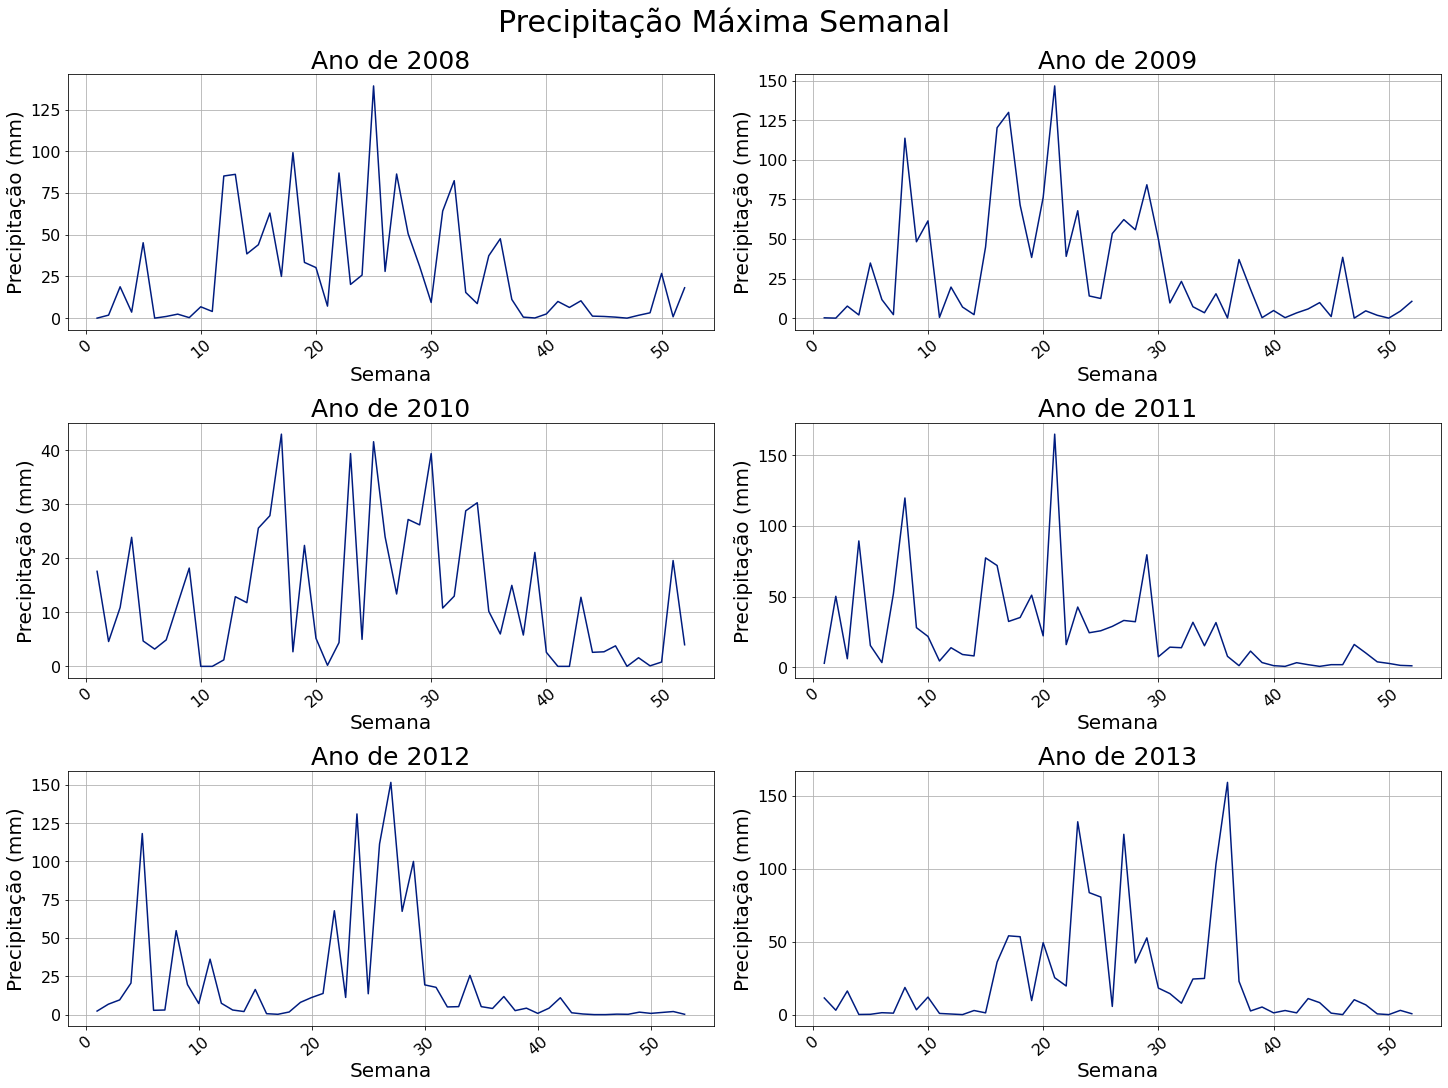

In [7]:
#Chuva

#criando os objetos para realizar o subplot
fig3, f3_axes  = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(20,15))

#Definindo o título superior
fig3.suptitle('Precipitação Máxima Semanal', size=30)

#Definindo os label y
label_y_C = 'Precipitação (mm)'
coluna_chuva_max = 'PRECIPITAÇÃO MÁXIMA(mm)'

#usando a função para realizar o gráfico
met_subplots(fig_axes = f3_axes, coluna = coluna_chuva_max , label_y = label_y_C, legenda = '')

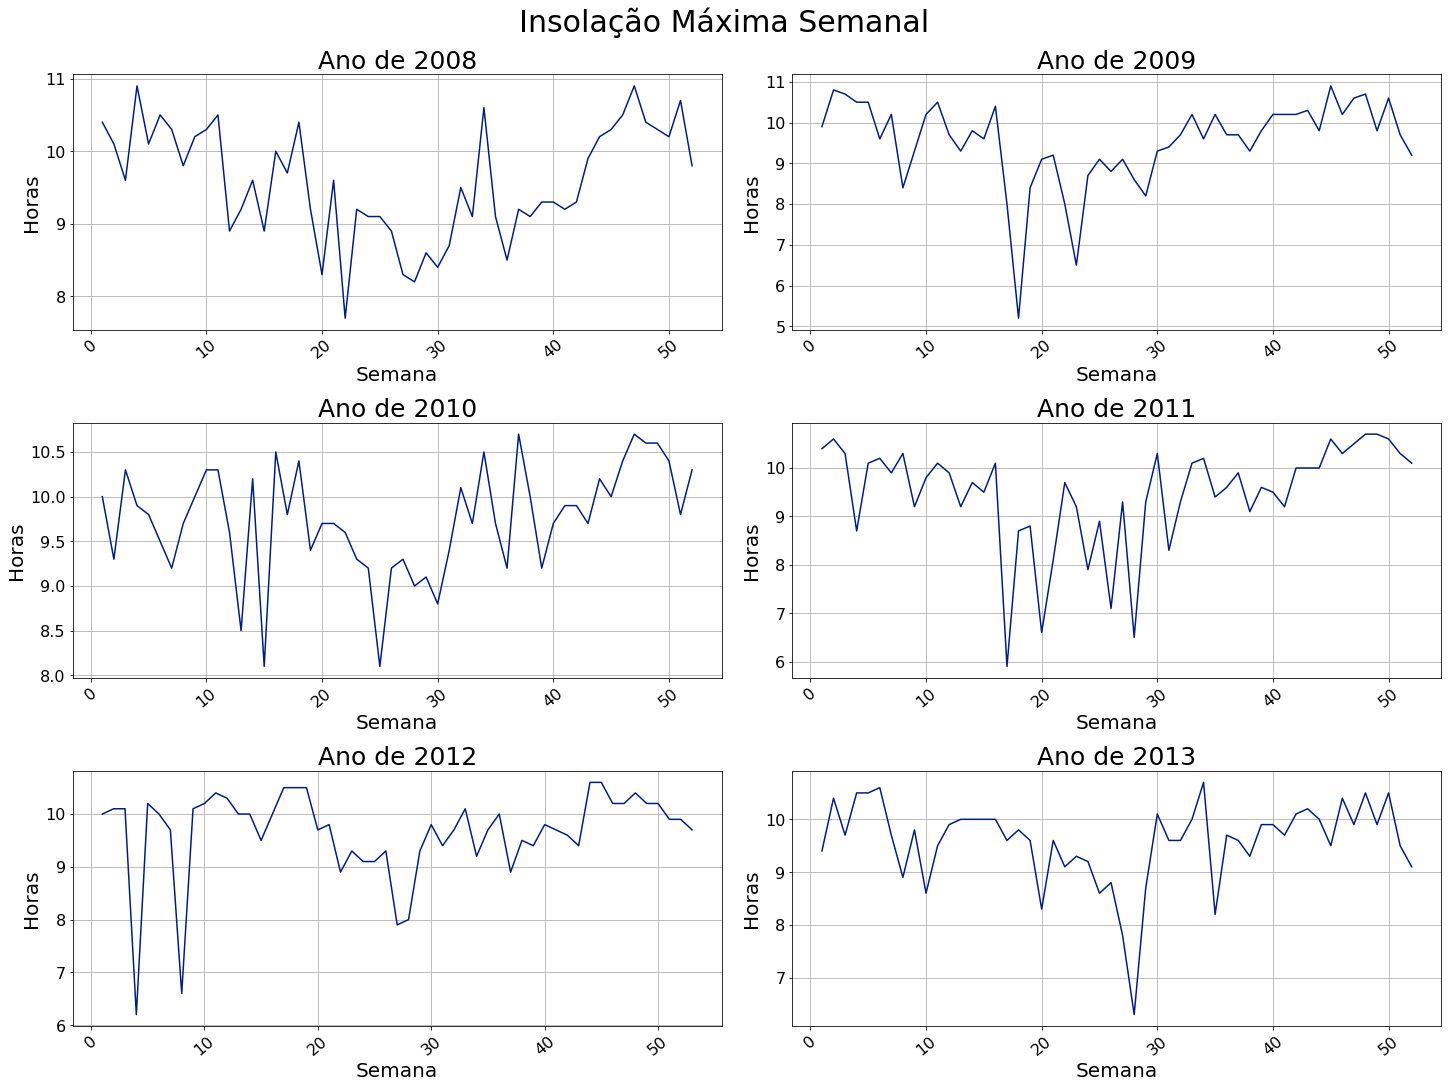

In [8]:
# Gráfico insolação 
fig4, f4_axes = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(20,15))

fig4.suptitle('Insolação Máxima Semanal', size=30)

label_y_insolacao = 'Horas' 
coluna_insolacao_max = 'INSOLAÇÃO MÁXIMA(h)'

met_subplots(fig_axes = f4_axes, coluna = coluna_insolacao_max, label_y = label_y_insolacao, legenda = '')        
